In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def arrow_0(vec, color):
    plt.arrow(0, 0, vec[0],vec[1], width = 0.05,color =color, alpha=0.7)
    
def basic_plot(A,B, lat_points = np.mgrid[-5:10,-5:10]):
    plt.scatter( *[x.flatten() for x in lat_points ])
    arrow_0(A[:,0], color='blue')
    arrow_0(A[:,1], color='blue')
    arrow_0(B[:,0], color='red')
    arrow_0(B[:,1], color='red')
    
    
def plot_grid(a1,a2,color,xy_limits=(5, 5)):
    
    x_points=xy_limits[0]#int(xy_limits[0]/(np.sqrt(a1[0]*a1[0])+np.sqrt(a2[0]*a2[0])))
    y_points=xy_limits[1]#-int(xy_limits[1]/(np.sqrt(a1[1]*a1[1])+np.sqrt(a2[1]*a2[0])))
    
    
    xc=[]
    yc=[]
    k=0
    for x in range(-x_points,x_points):
        y_points_1= y_points-k
        y_points_0= -y_points-k
        k=k+0
        for y in range(-y_points,y_points_1):
            xc.append(x*a1[0]+y*a2[0])
            yc.append(x*a1[1]+y*a2[1])
            
#             if(y!=0):
#                 xc.append(x*a1[0]-y*a2[0])
#                 yc.append(x*a1[1]-y*a2[1])
            
#             if(x!=0):
#                 xc.append(-x*a1[0]+y*a2[0])
#                 yc.append(-x*a1[1]+y*a2[1])
#                 if(y!=0):
#                     xc.append(-x*a1[0]-y*a2[0])
#                     yc.append(-x*a1[1]-y*a2[1])

    plt.scatter(xc,yc, color= color, alpha=0.5,s=10)

In [3]:
def v1v2_angle(v1,v2):
    dot_p= np.dot(v1,v2)
    mv1= np.sqrt(np.dot(v1,v1))
    mv2= np.sqrt(np.dot(v2,v2))
    return np.arccos(dot_p/(mv1*mv2))

def z0_rotation(theta):
    R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ]
    return R

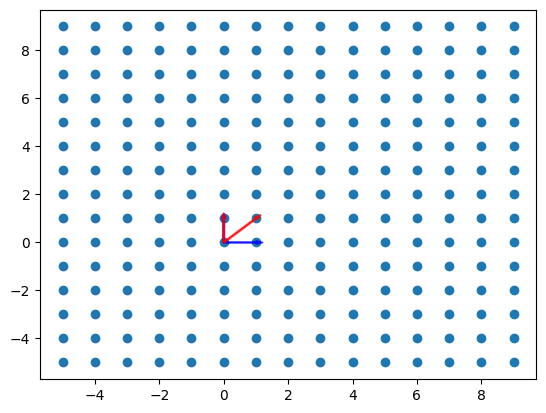

In [4]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 = a2 #np.sqrt(2)*np.dot(R,a2);
B  = np.transpose([b1,b2]);

basic_plot(A,B)

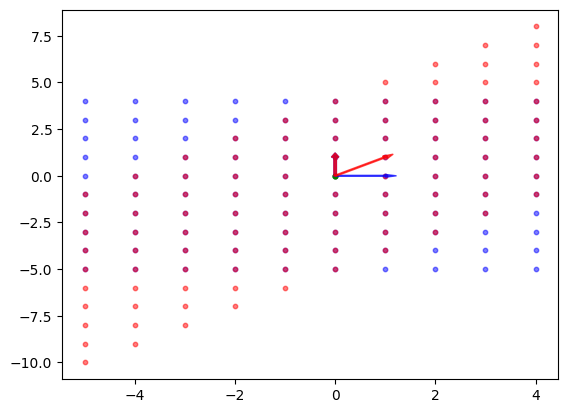

In [5]:
plot_grid(A[:,0],A[:,1],color='blue')
plot_grid(B[:,0],B[:,1],color='red')

plt.scatter([0],[0],color='green', s=12)
arrow_0(A[:,0], color='blue')
arrow_0(A[:,1], color='blue')
arrow_0(B[:,0], color='red')
arrow_0(B[:,1], color='red')

In [6]:
def v1v2_angle(v1,v2):
    dot_p= np.dot(v1,v2)
    mv1= np.sqrt(np.dot(v1,v1))
    mv2= np.sqrt(np.dot(v2,v2))
    return np.arccos(dot_p/(mv1*mv2))

a1b1_angle=v1v2_angle(A[:,0],B[:,0])
print("Angle a1b1=", a1b1_angle*(180/np.pi))

Angle a1b1= 45.0


A_0:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


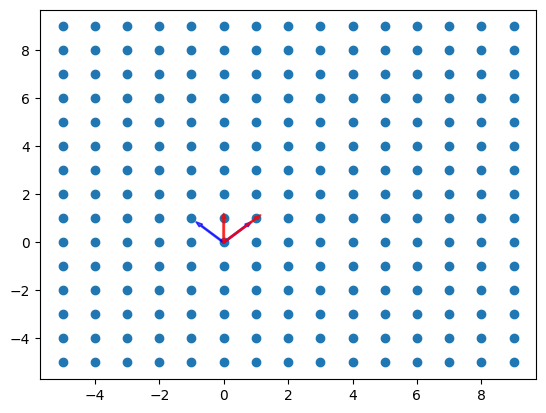

In [7]:
TA_0= z0_rotation(a1b1_angle)
A_0 = TA_0@A
print("A_0:\n", A_0)
basic_plot(A_0,B)

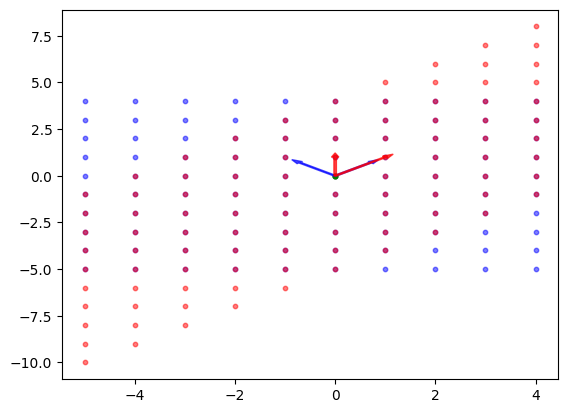

In [13]:
plot_grid(A[:,0],A[:,1],color='blue')
plot_grid(B[:,0],B[:,1],color='red')

plt.scatter([0],[0],color='green', s=12)
arrow_0(A_0[:,0], color='blue')
arrow_0(A_0[:,1], color='blue')
arrow_0(B[:,0], color='red')
arrow_0(B[:,1], color='red')

[[1.41421356 0.        ]
 [0.41421356 1.        ]]
TA_1:
 [[ 1.         -1.        ]
 [ 1.          0.41421356]]
A_1:
 [[ 1.         -1.        ]
 [ 1.          0.41421356]]


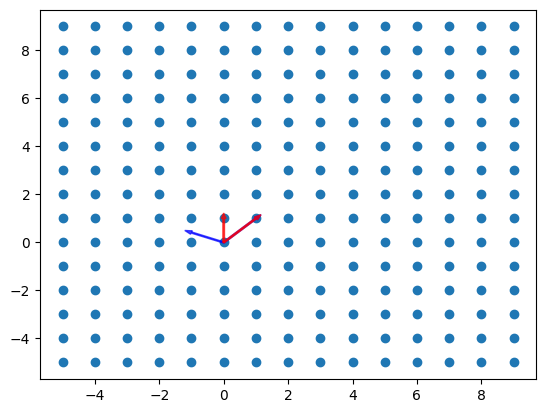

In [9]:
mod_b1 = np.sqrt(np.dot(B[:,0],B[:,0]))
mod_b2 = np.sqrt(np.dot(B[:,1],B[:,1]))

e1 = mod_b1/np.sqrt(np.dot(A[:,0],A[:,0]))
e2 = mod_b2/np.sqrt(np.dot(A[:,1],A[:,1]))
eig_v = np.array([[e1,0],
                 [0,e2]])

B_norm = np.array([[B[0][0]/mod_b1, B[0][1]/mod_b2],
                 [B[1][0]/mod_b1, B[1][1]/mod_b2]])

Scale = B_norm@eig_v@np.linalg.inv(B_norm)

print(Scale)

TA_1=Scale@TA_0
print("TA_1:\n", TA_1)

A_1 = TA_1@A
print("A_1:\n", A_1)
basic_plot(A_1,B)

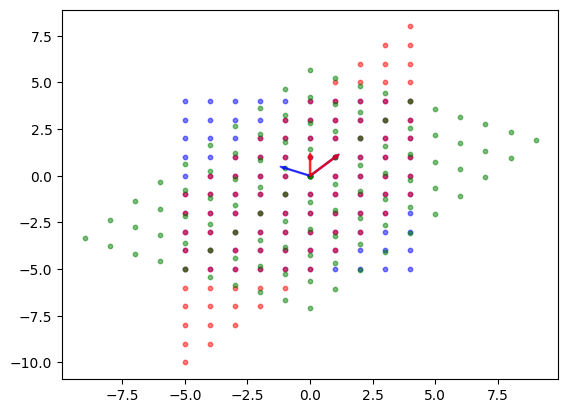

In [17]:
plot_grid(A[:,0],A[:,1],color='blue')
plot_grid(B[:,0],B[:,1],color='red')
plot_grid(A_1[:,0],A_1[:,1],color='green')

plt.scatter([0],[0],color='green', s=12)
arrow_0(A_1[:,0], color='blue')
arrow_0(A_1[:,1], color='blue')
arrow_0(B[:,0], color='red')
arrow_0(B[:,1], color='red')

In [11]:
B

array([[1., 0.],
       [1., 1.]])